All Rows and Columns of the Unemployment Rates Dataset:
                  Unemployment_Rate
observation_date                   
1948-01-01                      3.4
1948-02-01                      3.8
1948-03-01                      4.0
1948-04-01                      3.9
1948-05-01                      3.5
1948-06-01                      3.6
1948-07-01                      3.6
1948-08-01                      3.9
1948-09-01                      3.8
1948-10-01                      3.7
1948-11-01                      3.8
1948-12-01                      4.0
1949-01-01                      4.3
1949-02-01                      4.7
1949-03-01                      5.0
1949-04-01                      5.3
1949-05-01                      6.1
1949-06-01                      6.2
1949-07-01                      6.7
1949-08-01                      6.8
1949-09-01                      6.6
1949-10-01                      7.9
1949-11-01                      6.4
1949-12-01                      6.6
1950-01-

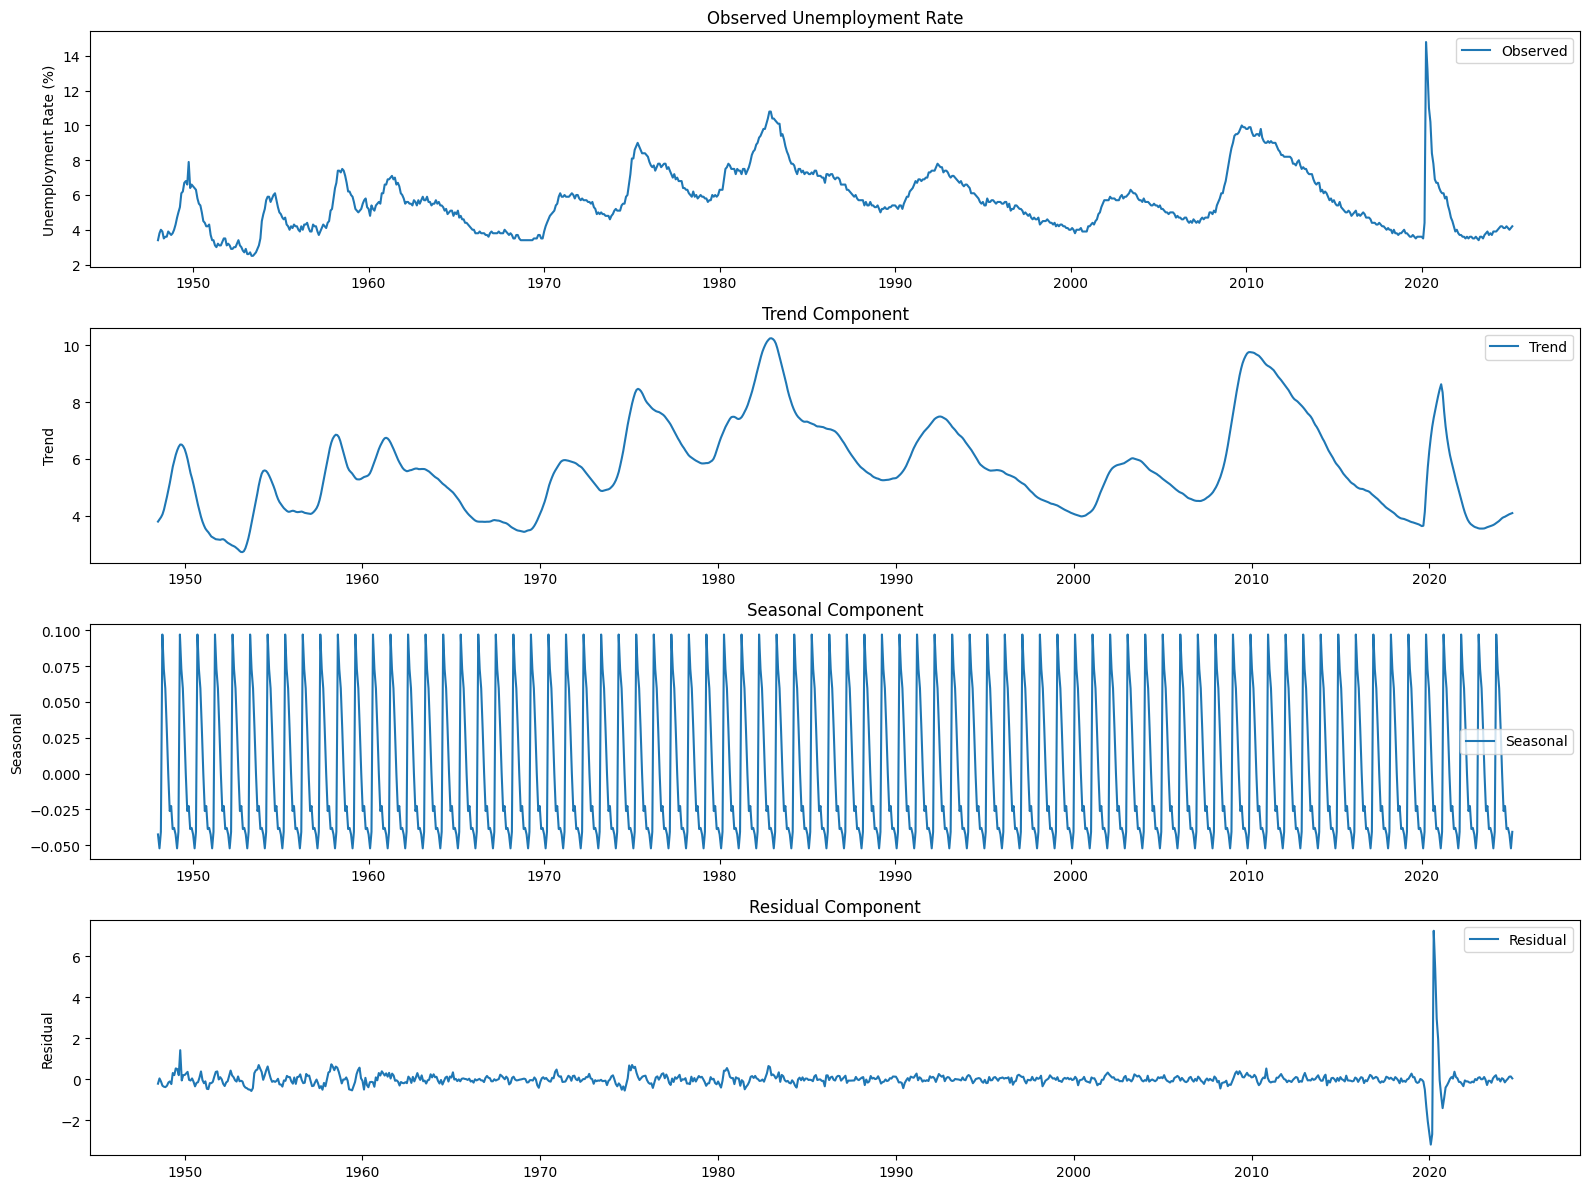

<Figure size 1200x600 with 0 Axes>

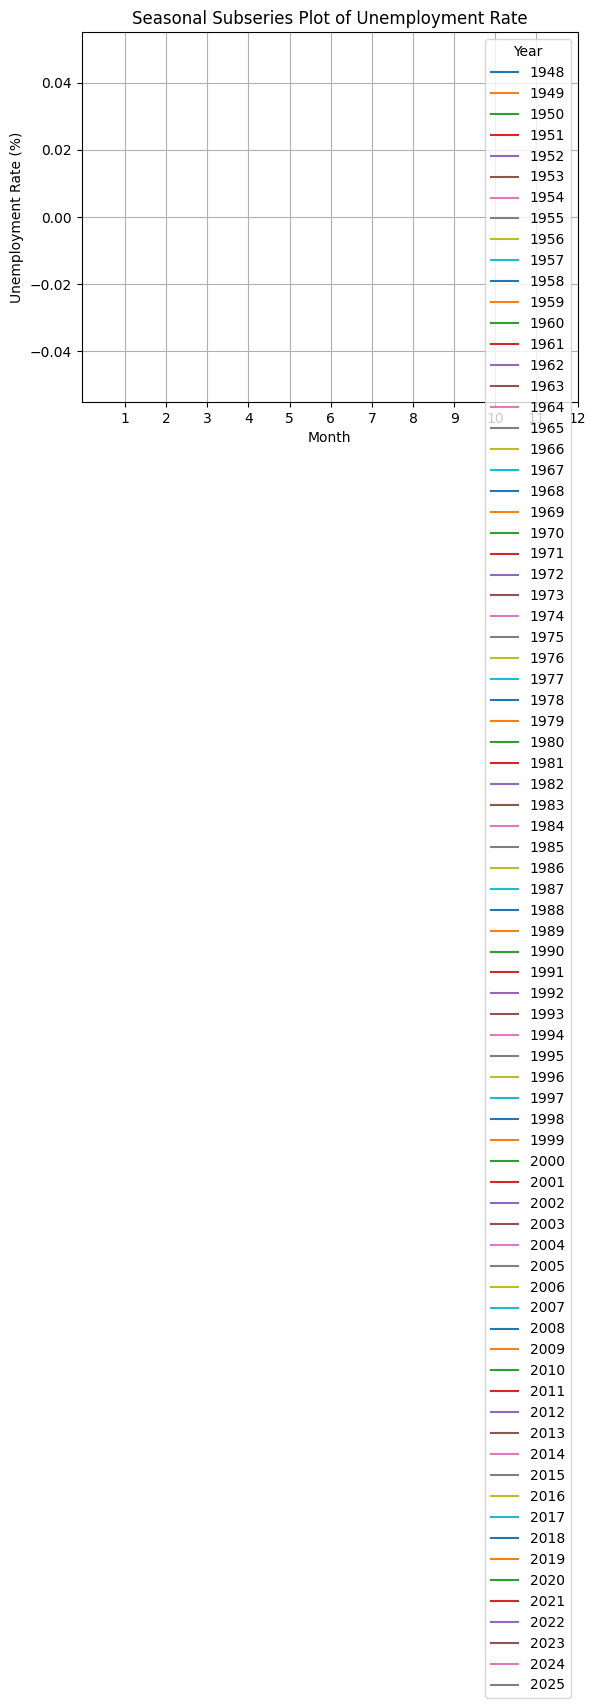


Remember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for seasonality analysis and decomposition.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Monthly Unemployment Rates dataset from FRED
file_path = 'C:/Users/USER/Downloads/UNRATE.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
    df.rename(columns={'UNRATE': 'Unemployment_Rate'}, inplace=True)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the unemployment rates dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns (optional, but good for inspection)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the Unemployment Rates Dataset:")
print(df)

# Perform Seasonal Decomposition (assuming additive model for unemployment rate)
# You might need to adjust the 'model' parameter ('additive' or 'multiplicative')
# based on the nature of your data. Check the time series plot for trends in
# the magnitude of seasonal fluctuations.
result = seasonal_decompose(df['Unemployment_Rate'], model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(16, 12))

plt.subplot(4, 1, 1)
plt.plot(df.index, result.observed, label='Observed')
plt.ylabel('Unemployment Rate (%)')
plt.title('Observed Unemployment Rate')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend, label='Trend')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal, label='Seasonal')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid, label='Residual')
plt.ylabel('Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Create Seasonal Subseries Plots
if len(df) >= 24:  # Ensure at least two years of data for meaningful subseries
    years = sorted(df.index.year.unique())
    n_years = len(years)
    months = range(1, 13)
    seasonal_subseries = pd.DataFrame(index=months)

    for year in years:
        year_data = df[df.index.year == year]['Unemployment_Rate']
        seasonal_subseries[str(year)] = year_data.reindex(months).values

    plt.figure(figsize=(12, 6))
    seasonal_subseries.plot(kind='line', legend=False)
    plt.title('Seasonal Subseries Plot of Unemployment Rate')
    plt.xlabel('Month')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(months)
    plt.grid(True)
    plt.legend(years, title='Year')
    plt.show()
else:
    print("\nNot enough data to create meaningful seasonal subseries plots (requires at least two years).")

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for seasonality analysis and decomposition.")